# Access historical data

In [1]:
%matplotlib inline
%pylab inline --no-import-all
pylab.rcParams['figure.figsize'] = (18, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ntfdl import Dl

In [3]:
stl = Dl('STL', exchange='OSE', download=False)

In [4]:
history = stl.get_history()

In [5]:
history.tail()

,date,open,high,low,close,volume,turnover
date,,,,,,,
2017-11-14,2017-11-14,167.6,168.8,166.1,166.4,3080709,514900048
2017-11-15,2017-11-15,164.2,165.0,163.1,164.3,3294372,541059056
2017-11-16,2017-11-16,165.2,166.1,162.9,164.0,3265504,536706254
2017-11-17,2017-11-17,163.9,164.5,162.3,164.0,2598704,425665367
2017-11-20,2017-11-20,163.8,165.0,163.3,164.2,1968301,323219544


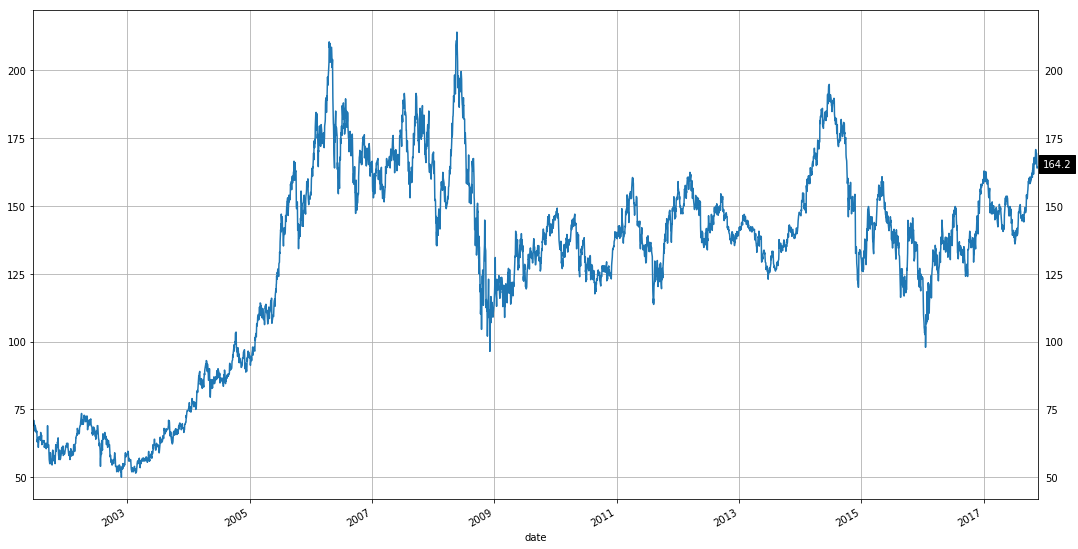

In [6]:
fig, ax = plt.subplots()
ax.tick_params(labeltop=False, labelright=True)
history.close.plot()
plt.grid()

# Annotate last quote
xmin, xmax = ax.get_xlim()
plt.annotate(history.iloc[-1].close, xy=(1.005, history.iloc[-1].close), xytext=(0, 0), \
                 xycoords=('axes fraction', 'data'), textcoords='offset points', backgroundcolor='k', color='w')

### Including moving averages
Moving averages are calculated using pandas rolling.mean() and adds a column for each window size given in the list where each columns is prefixed 'ma' followed by window size.

In [7]:
history_ma = stl.get_history(mas=[10,20,50,100,200])

In [8]:
history_ma.tail(5)

,date,open,high,low,close,volume,turnover,ma10,ma20,ma50,ma100,ma200
date,,,,,,,,,,,,
2017-11-14,2017-11-14,167.6,168.8,166.1,166.4,3080709,514900048,168.06,165.910,160.180,152.012,149.7775
2017-11-15,2017-11-15,164.2,165.0,163.1,164.3,3294372,541059056,167.84,166.060,160.486,152.245,149.8265
2017-11-16,2017-11-16,165.2,166.1,162.9,164.0,3265504,536706254,167.69,166.230,160.786,152.487,149.8795
2017-11-17,2017-11-17,163.9,164.5,162.3,164.0,2598704,425665367,167.55,166.275,161.116,152.743,149.9275
2017-11-20,2017-11-20,163.8,165.0,163.3,164.2,1968301,323219544,167.24,166.315,161.432,152.990,149.9835


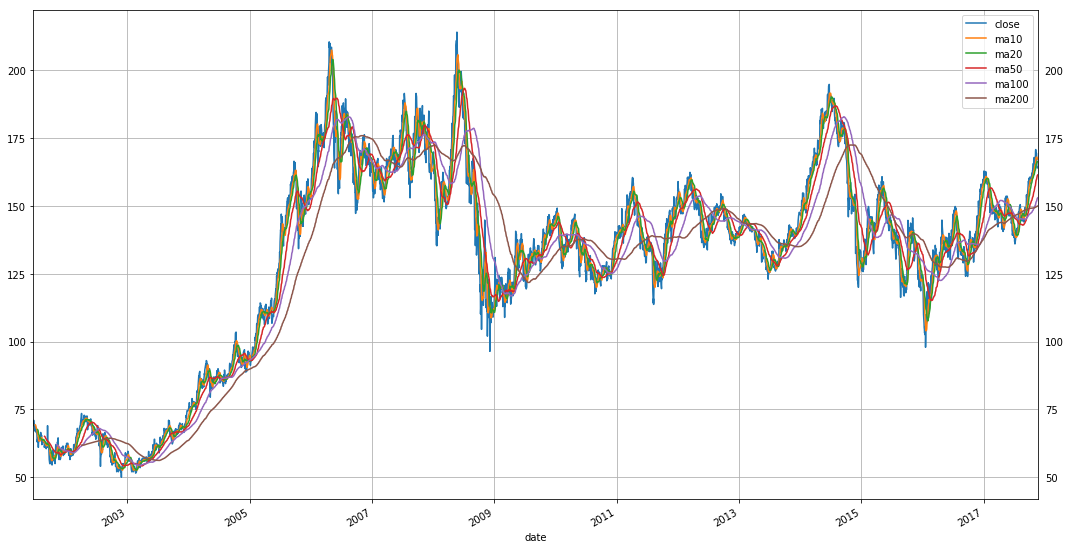

In [9]:
fig, ax = plt.subplots()
ax.tick_params(labeltop=False, labelright=True)
history_ma[['close','ma10','ma20','ma50','ma100','ma200']].plot(ax=ax)
plt.grid()

Busy chart, let's instead slice the pandas with the [from:to] syntax looking at some days of horror between 2008 and 2009.

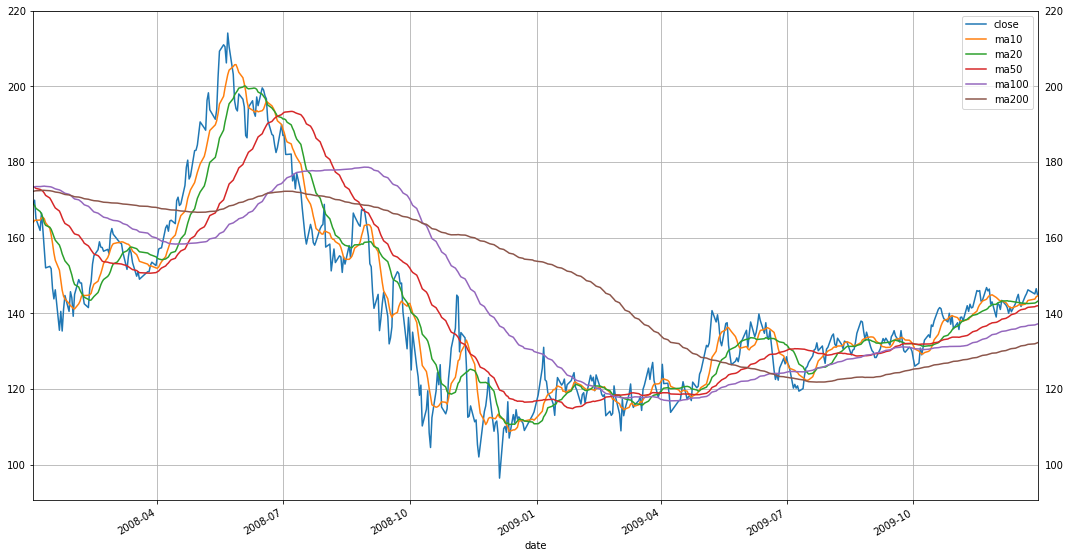

In [10]:
fig, ax = plt.subplots()
ax.tick_params(labeltop=False, labelright=True)
history_ma['2008-01-01':'2010-01-01'][['close','ma10','ma20','ma50','ma100','ma200']].plot(ax=ax)
plt.grid()

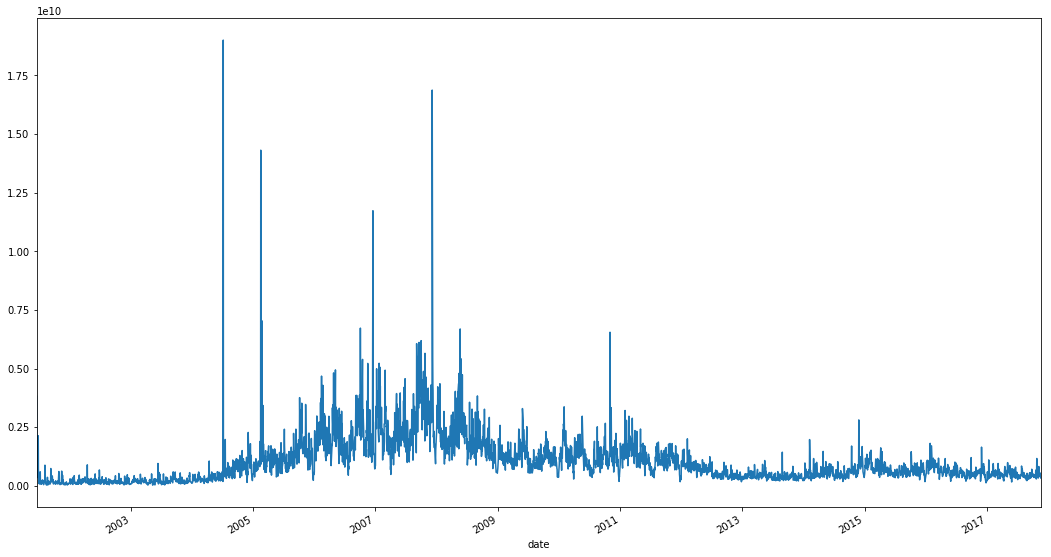

In [11]:
history.turnover.plot()